##### Library Imports

In [41]:
import random
import os
import shutil
import cv2
from matplotlib import pyplot as plt
from tqdm import tqdm
import albumentations as A

##### Augmenting One Image using Albumentations

In [3]:
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

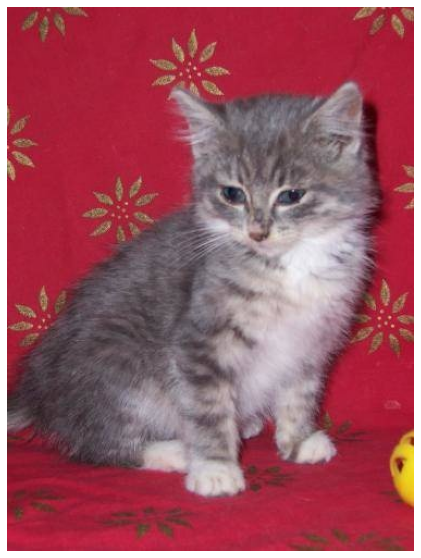

In [4]:
file = 'datasets/train/cat/cat.110.jpg'

image = cv2.imread(file)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
visualize(image)

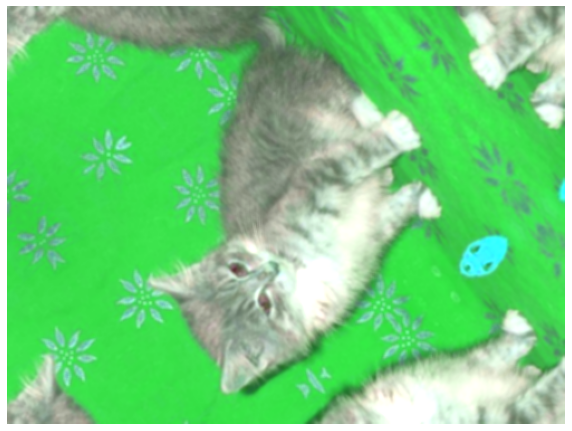

In [31]:
transform = A.Compose([
    A.ChannelShuffle(),     # Randomly rearrange channels of the input RGB image.
    A.HueSaturationValue(), # Randomly change hue, saturation and value of the input image.
    A.RandomRotate90(),     # Randomly rotate the input by 90 degrees zero or more times.
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50, rotate_limit=45, p=.75), # Randomly apply affine transforms: translate, scale and rotate the input.
    A.Blur(blur_limit=3, p=0.75), # Blur the input image using a random-sized kernel.
    A.RandomBrightnessContrast(p=0.5), # Randomly change brightness and contrast of the input image.
    A.HorizontalFlip(p=0.5), # Randomly flips the image horizontally.
    A.VerticalFlip(p=.5) # Randomly flips the image vertically.
])
random.seed(42) 
augmented_image = transform(image=image)['image']
visualize(augmented_image)

##### Pipeline to Augment a Folder

In [46]:
base_dir = './datasets/train/dog/'
dest_dir = './datasets/train_aug/dog/'
random.seed(42) 

transform = A.Compose([
    A.ChannelShuffle(),     # Randomly rearrange channels of the input RGB image.
    A.HueSaturationValue(), # Randomly change hue, saturation and value of the input image.
    A.RandomRotate90(),     # Randomly rotate the input by 90 degrees zero or more times.
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50, rotate_limit=45, p=.75), # Randomly apply affine transforms: translate, scale and rotate the input.
    A.Blur(blur_limit=3, p=0.75), # Blur the input image using a random-sized kernel.
    A.RandomBrightnessContrast(p=0.5), # Randomly change brightness and contrast of the input image.
    A.HorizontalFlip(p=0.5), # Randomly flips the image horizontally.
    A.VerticalFlip(p=.5) # Randomly flips the image vertically.
])

for file in tqdm(os.listdir(base_dir)):
    image = cv2.imread(os.path.join(base_dir, file))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    augmented_image = transform(image=image)['image']
    cv2.imwrite(os.path.join(dest_dir, 'aug_'+file), cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR))
    shutil.copy(os.path.join(base_dir, file), os.path.join(dest_dir, file))
    

100%|██████████| 10000/10000 [02:37<00:00, 63.47it/s]


In [47]:
print('Total training data after augmentation (cat):', len(os.listdir('datasets/train_aug/cat/')))
print('Total training data after augmentation (dog):', len(os.listdir('datasets/train_aug/dog/')))

Total training data after augmentation (cat): 20000
Total training data after augmentation (dog): 20000
